In [1]:
%matplotlib inline

In [2]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('City_of_Austin_Employee_Detail_Information.csv')
df[['Emp ID', 'Last', 'Annual Salary']][0:10]

,Emp ID,Last,Annual Salary
0,10000003,Turner,$62608.00
1,10000008,Michael,$146101.28
2,10000015,Greco,$96345.60
3,10000022,Wiswell-DeCampo,$45676.80
4,10000026,White,$109867.68
5,10000039,Candoli,$100800.96
6,10000066,Mason,$126349.60
7,10000084,Lynch,$94203.20
8,10000127,Wosky,$93977.52
9,10000132,Ringuette,$75487.36


In [4]:
df['annual_salary'] = df['Annual Salary'].map(lambda x: float(x.strip('$')))

In [5]:
# Amount of employees
len(df)

15521

In [6]:
# Amount of departments
len(df['Department Name'].value_counts())

36

In [7]:
# Median salary
df['annual_salary'].median()

51854.4

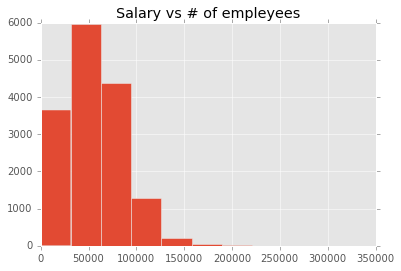

In [8]:
# Salaries histogram
histogram = df['annual_salary'].hist().set_title("Salary vs # of empleyees")

In [9]:
# Top compensation in the City of Austin
df.ix[df['annual_salary'].sort_values(ascending=False)[0:10].index][['Last', 'Department Name', 'Title', 'Annual Salary']]

,Last,Department Name,Title,Annual Salary
9527,Weis,Austin Energy,General Mgr Electric Utility,$315328.00
8172,Ott,Management Services,City Manager,$279198.40
49,Smith,Aviation,"MuniProg, Official/Admin",$277971.20
9002,Hinchey,Management Services,EMS System Medical Director,$255320.00
59,Mele,Austin Energy,AE Chief Operating Officer,$218899.20
4397,Overton,Austin Energy,"Dep GM, Shared Services",$218899.20
8242,Goode,Management Services,Assistant City Manager,$210995.20
11869,Arellano,Management Services,Assistant City Manager,$210995.20
7204,Lumbreras,Management Services,Assistant City Manager,$210995.20
568,Edwards,Management Services,Assistant City Manager,$210995.20


In [10]:
# Most popular departments in the City of Austin
salary_median = df.groupby('Department Name')['annual_salary'].median().sort_values()
employees_per_department = df['Department Name'].value_counts()
pd.DataFrame({'Median Salary': salary_median, 'Employees': employees_per_department}).sort_values('Employees', ascending=False)[0:10]

,Employees,Median Salary
Parks & Recreation,2362,21320.00
Police,2358,75487.36
Austin Energy,1633,72030.40
Fire,1153,77724.66
Health & Human Services,1141,7540.00
Austin Water Utility,1089,52083.20
Public Works,677,39811.20
Emergency Medical Services,532,57158.40
Convention Center,479,33737.60
Austin Resource Recovery,434,42078.40


In [11]:
labels = [
    '0 - 31k', '31k - 63k', '63k - 94k',
    '94k - 120k', '126k - 157k', '157k - 189k',
    '189k - 220k', '220k - 252k', '252k - 283k', '283k - 315k']
df['salary_range'] = pd.cut(df['annual_salary'], 10, labels=labels)

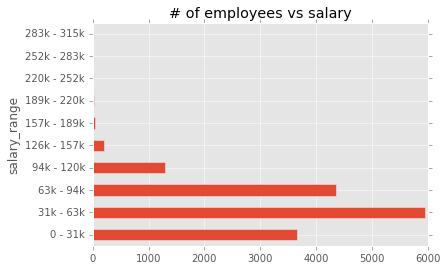

In [12]:
df.groupby('salary_range')['Gender'].count().plot(kind='barh').set_title('# of employees vs salary')

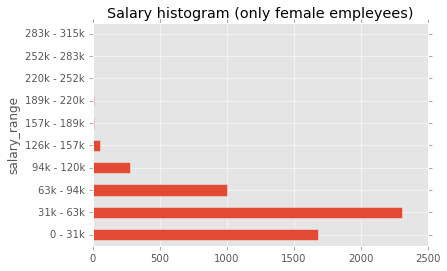

In [13]:
# Number of F employees by salary
df[df['Gender'] == 'F'].groupby('salary_range')['Gender'].count().plot(kind='barh').set_title("Salary histogram (only female empleyees)")

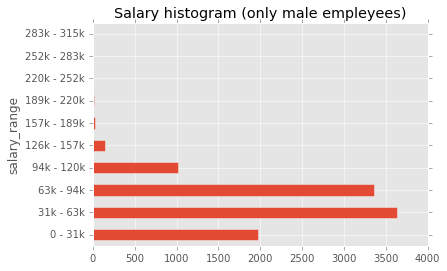

In [14]:
# Number of M employees by salary
df[df['Gender'] == 'M'].groupby('salary_range')['Gender'].count().plot(kind='barh').set_title("Salary histogram (only male empleyees)")

In [15]:
# % of male empleyees earning between 63k and 94k
df[df['Gender'] == 'M'].groupby('salary_range')['Gender'].count()[2]/len(df[df['Gender'] == 'M'])

0.33009231978000392

In [16]:
# % of female empleyees earning between 63k and 94k
df[df['Gender'] == 'F'].groupby('salary_range')['Gender'].count()[2]/len(df[df['Gender'] == 'F'])

0.18786289567334707

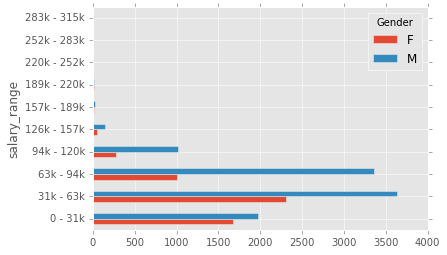

In [17]:
# Combining gender income
df.groupby(['salary_range', 'Gender']).count().unstack()['Emp ID'].plot(kind='barh')

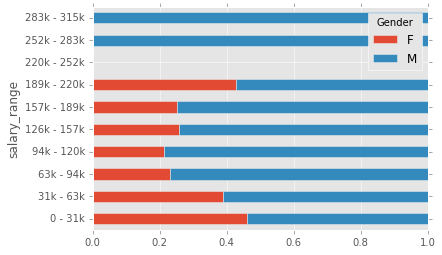

In [18]:
# Combining gender income (normalized)
combined = df.groupby(['salary_range', 'Gender']).count().unstack()['Emp ID']
normed_subset = combined.div(combined.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

In [19]:
# Salaries by ethnicity
df.groupby('Ethnicity')['annual_salary'].median()

Ethnicity
American Indian/Aleutian    55120.00
Asian/Pacific Islander      63944.66
Black                       38729.60
Hispanic                    42265.60
Other                       21320.00
White                       63128.00
Name: annual_salary, dtype: float64

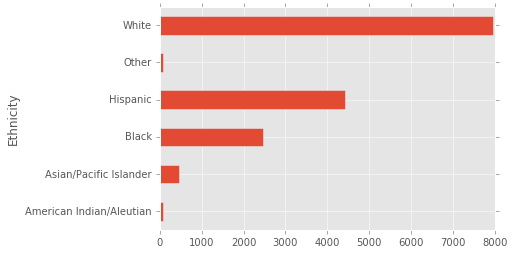

In [20]:
# Ethnic breakdown
df.groupby('Ethnicity')['annual_salary'].count().plot(kind='barh')